# Dijkstra's Algorithm
- Finds the shortest path from a source node to all other nodes
 - Can be stopped early if you only care about 1 other node
- Works on directed and undirected graphs
- Runs in O(|E| + |V|log|V|)
- Space is O(|V|)
- Uses min heap to find the next hop
    - Stores the distance to the the *unvisited* nodes and the the node itself (dist, node)

In [5]:
import heapq

def dijkstras(matrix, start):
    num_nodes = len(matrix)
    dist = [float('inf') for i in range(num_nodes)]
    parent = [None for i in range(num_nodes)]
    dist[start] = 0
    pq = [(0, start)]
    while pq:
        cur_cost, cur_node = heapq.heappop(pq)
        for n in range(num_nodes):
            cost = matrix[cur_node][n]
            if not cost: # 0 means no path between nodes
                continue
            alt = cur_cost + cost
            if alt < dist[n]:
                parent[n] = cur_node
                dist[n] = alt
                updated = False
                for i in range(len(pq)):
                    if pq[i][1] == n:
                        pq[i] = (alt, n)
                        updated = True
                        heapq.heapify(pq)
                        break
                if not updated:
                    heapq.heappush(pq, (alt, n))
    return dist, parent    

([0, 6, 6, 2, 3], [None, 4, 4, 0, 0])


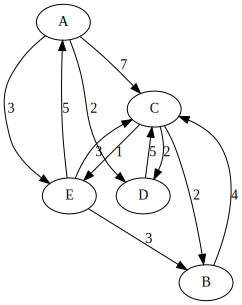

In [9]:
import graphviz

matrix1 = [
    [0,0,7,2,3],
    [0,0,4,0,0],
    [0,2,0,2,1],
    [0,0,5,0,0],
    [5,3,3,0,0]
]
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
g = graphviz.Digraph()
for i in range(len(matrix1)):
    g.node(letters[i])
for row in range(len(matrix1)):
    for col in range(len(matrix1)):
        start = letters[row]
        end = letters[col]
        cost = matrix1[row][col]
        if not cost:
            continue
        g.edge(start, end, label=str(cost))
print(dijkstras(matrix1, 0))
g